## List coloring of planar triangulations

According to Thomassen's theorem every planar graph is 5-choosable. The algorithm for list coloring planar graphs is described in Lecture Notes available [here](http://matematika.fri.uni-lj.si/dm/discrete_mathematics.pdf), Section 6.3. See also Lectures!

#### Auxillary functions

In [1]:
def rotate(emb, u, v):
    """Finds the neighbors of `u` which comes in the counter-clockwise order
    after the neighbor `v`.    
    `emb` contains clockwise ordering of the neighbors. We need
    the vertex just before `v`."""
    vi = emb[u].index(v)
    return emb[u][vi - 1]

In [2]:
def face(G):
    """Returns a face ("facial walk") in the planar embedding of `G`."""
    G.is_planar(set_embedding=True, set_pos=True)
    F = G.faces()[0]
    F = [x for (x, y) in F]
    return F

Example

In [3]:
G = Graph('IxEeJNw]G')
F = face(G)

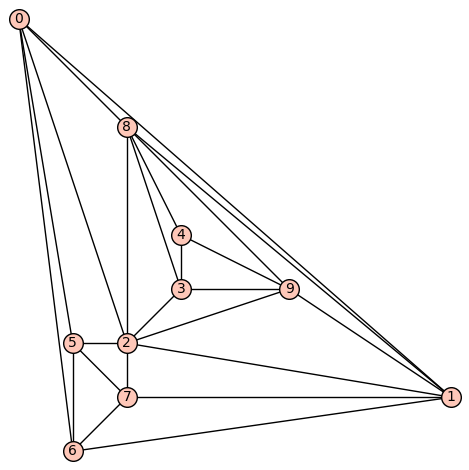

In [4]:
G.plot()

In [5]:
G.get_embedding()

{0: [1, 8, 2, 5, 6],
 1: [6, 7, 2, 9, 8, 0],
 2: [0, 8, 3, 9, 1, 7, 5],
 3: [8, 4, 9, 2],
 4: [8, 9, 3],
 5: [0, 2, 7, 6],
 6: [0, 5, 7, 1],
 7: [6, 5, 2, 1],
 8: [0, 1, 9, 4, 3, 2],
 9: [1, 2, 3, 4, 8]}

F is (outer) face (in clockwise order)

In [6]:
F

[0, 1, 6]

The vertex following 8 in the embedding around 3 in the counter-clockwise order is 2

In [7]:
rotate(G.get_embedding(), 3, 8)

2

#### Implementation of the algorithm

Notes:
* We can implement the algorithm without altering G
* We will, however, alter lists in L (we will remove colors from them)

In [8]:
def list_coloring(G, L):
    """
    Colors a planar triangulation `G` using colors in color map `L`; that is `L` maps a vertex to a list of length 5 containing
    5 (different) integers representing admissible colors for this vertex
    
    """
    F = face(G)  # choose a face
    emb = G.get_embedding()  # get embedding
    
    u, v = F[0], F[1]  # choose two consecutive vertices from face F
    col = {}  # coloring is empty at the beginning
    col[u] = L[u][0]  # color u with the first color in its list
    if L[v][0] == col[u]:  
        col[v] = L[v][1]  # color v with the second color in its list, if the first one is the same as the color used for v
    else:
        col[v] = L[v][0]  # color v with the first color in its list, if it is not the same as color used for v
        
    list_coloring_rec(emb, L, F, col)  # recursive coloring
    return col

In [9]:
def list_coloring_rec(emb, L, F, col):
    """`list_coloring_rec` extends the coloring `col` to include all
    of the vertices inside the cycle `F` and on `F`.
    
    We assume that the vertices `F[0]` and `F[1]` are already
    colored in `col`, that color lists for vertices of `F` have length (at least) 3 and all lists for vertices
    inside cycle `F` have length 5.
    
    Arguments:
        - `emb`: embedding of the graph
        - `L`: list of colors
        - `F`: a cycle in `G`
        - `col`: a coloring as a dictionary.
    
    Side effects:
        - extends the coloring `col` to `F`."""
    
    u, v, w = F[0], F[1], F[2]  # let u, v, w be consecutive vertices on cycle F
    
    # Base of the recursion: 
    # If G is a triangle (F), then we can color F easily, since we assume that 
    # each vertex of F has 3 available colors
    # Question: How do we know that at this moment "G" is a triangle? (since we do not alter G)
    # Clearly |F| must be 3, but this is not enough, the "interior of F must be empty
    if len(F) == 3 and rotate(emb, v, u) == w:
        if L[w][0] != col[v] and L[w][0] != col[u]:
            col[w] = L[w][0]
        elif L[w][1] != col[v] and L[w][1] != col[u]:
            col[w] = L[w][1]
        else:
            col[w] = L[w][2]
        return
    
    z = u if len(F) == 3 else F[3]
    P = []
    
    # Try to find a chord from w (see illustration below):
    # Algorithm: rotate v around w until you hit a vertex in F which is not z; use rotate function defined above
    chord_found = False
    x = rotate(emb, w, v)
    while x != z:
        if x in F:
            chord_found = True
            break
        else:
            P.append(x)
        x = rotate(emb, w, x)
            
    # if chord is found, recursively run this algorithm with F1 = [u, v, w, x, .....]
    # and then with F2 = [x, w, z, ...]
    if chord_found:
        xi = F.index(x) if x != u else len(F)
        F1 = [u, v, w] + F[xi:]
        F2 = [x, w] + F[3:xi]
        list_coloring_rec(emb, L, F1, col)
        list_coloring_rec(emb, L, F2, col)
    else:
        # Let P = [x1, x2, ..., xk]
        # From the list of colors for w, L[w], remove color of v (v is already colored!), if exists in L[w]
        # from the lists of each vertex in P remove two colors from L[w] (any two, and there are at least 2!)
        # recursively call this function with F_ = [u, v, x1, ..., xk, z, ...]
        # and the extend coloring to w. How?
        F_ = [u, v] + P + F[3:]
        if col[v] in L[w]:
            L[w].remove(col[v])
        for p in P:
            if L[w][0] in L[p]:
                L[p].remove(L[w][0])
            if L[w][1] in L[p]:
                L[p].remove(L[w][1])
        list_coloring_rec(emb, L, F_, col)
        col[w] = L[w][0] if L[w][0] != col[z] else L[w][1]


[](chordsccw.png)

![alt text](chordsccw.png "Title")

### Tests

In [9]:
def random_list(n):
    """Returns 5 random numbers from 0 .. n - 1."""
    import random
    L = random.sample(range(n), 5)
    L.sort()
    return L

In [10]:
def random_lists(G, n = 9):
    """Returns a random color lists for the graph `G`."""
    L = {}
    for v in G.vertices():
        L[v] = random_list(n)
    return L

In [11]:
def check_coloring(G, L, col):
    """Checks is `col` is an `L`-coloring of the graph `G`."""
    
    # colors should be from the lists
    for v in G.vertices():
        if col[v] not in L[v]:
            return False
    
    # endpoints of edges should have different colors
    for e in G.edges(labels = False):
        if col[e[0]] == col[e[1]]:
            return False

    return True

def plot_colored(G, col):
    G.is_planar(set_pos=True)
    res = {}
    cnames = list(colors.keys())[10:]  # colors from the built-in sequence of colors, we take colors from 10 on...
    for v, c in col.items():
        res.setdefault(cnames[c], []).append(v)
    return G.plot(vertex_colors=res)

In [14]:
G = Graph('IxEeJNw]G')
L = random_lists(G)
check_coloring(G, L, list_coloring(G, L))

True

In [15]:
L

{0: [1, 3, 4, 5, 8],
 1: [0, 1, 3, 4, 8],
 2: [2, 4, 7],
 3: [0, 6, 8],
 4: [2, 5, 7, 8],
 5: [0, 1, 3, 5, 8],
 6: [2, 4, 5, 6, 8],
 7: [1, 3, 5, 8],
 8: [1, 3, 6, 7, 8],
 9: [3, 5, 6, 7]}

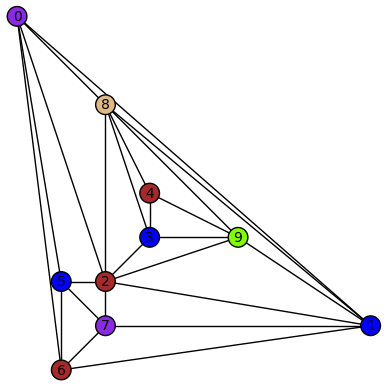

In [16]:
plot_colored(G, list_coloring(G, L))

In [17]:
G = Graph('NtKwwO@?]q_JwEI[_EG')
L = random_lists(G)
check_coloring(G, L, list_coloring(G, L))

True

In [18]:
G = Graph('SmSWGKT?WBaC{@c?W?M?@O?LO@b^k?E?C')
L = random_lists(G)
check_coloring(G, L, list_coloring(G,L))

True

In [19]:
G = Graph('Xj[xW[g?g@_FAIA__RXC_GKC?oIo?@??@_??o??G??@}??NG??X')
L = random_lists(G)
check_coloring(G, L, list_coloring(G, L))

True

In [20]:
G = Graph(']zSwGKF?_?_B?A??_?W?_?EC?WG?So?`c?AB??gG?@B_ACG?CG@??G?hz_?^K_?D?Aw?W?@_?G')
L = random_lists(G)
check_coloring(G, L, list_coloring(G, L))

True

In [21]:
G = graphs.RandomTriangulation(50)
L = random_lists(G)
check_coloring(G, L, list_coloring(G, L))

True